# RoadMap 8 - Torch NN Layers - Activation

    1.   torch.nn.ELU
    2.   torch.nn.Hardshrink
    3.   torch.nn.Hardtanh 
    4.   torch.nn.LeakyReLU
    5.   torch.nn.LogSigmoid
    6.   torch.nn.PReLU
    7.   torch.nn.ReLU
    8.   torch.nn.ReLU6
    9.   torch.nn.RReLU
    10.  torch.nn.SELU
    11.  torch.nn.Sigmoid
    12.  torch.nn.Softplus
    13.  torch.nn.Softshrink
    14.  torch.nn.Softsign
    15.  torch.nn.TanH
    16.  torch.nn.Tanhshrink
    17.  torch.nn.Threshold
    18.  torch.nn.Softmin
    19.  torch.nn.Softmax
    20.  torch.nn.Softmax2d
    21.  torch.nn.LogSoftmax
    22.  torch.nn.AdaptiveLogSoftmaxWithLoss
    
    
    23. All the above layers as FUNCTIONAL modules
     
    

In [1]:
import os
import sys
import torch
import numpy as np

In [2]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

# Functional libraries
import torch.nn.functional as F

## Extra Blog Resources

1. https://www.geeksforgeeks.org/activation-functions-neural-networks/
    
2. https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
    
3. https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

torch.Size([1, 3, 576, 768])


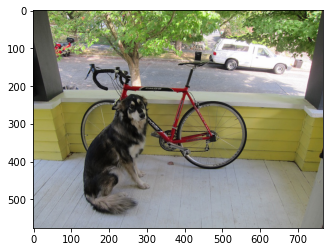

In [3]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

In [4]:
# Exponential linear Unit Function

'''
1. nn.ELU - Applies element-wise, ELU(x)=max(0,x)+min(0,α∗(exp(x)−1))
        - alpha – the α value for the ELU formulation. Default: 1.0
        - inplace – can optionally do the operation in-place. Default: False
'''

print("Module implementation")
m = nn.ELU(alpha = 2.0)
input_data = torch.randn(5)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.elu(input_data, alpha=1.0, inplace=False)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.8770, -0.1710,  0.8453,  1.0512, -0.8634])
output =  tensor([ 0.8770, -0.3143,  0.8453,  1.0512, -1.1565])


Functional implementation
output =  tensor([ 0.8770, -0.1571,  0.8453,  1.0512, -0.5783])




### Hard Shrinkage Function


2. nn.Hardshrink - Applies the hard shrinkage function element-wise Hardshrink 
        - lambd – the λ value for the Hardshrink formulation. Default: 0.5

    Hard Shrinkage Function:
    
$$\begin{split}\text{HardShrink}(x) = 
\begin{cases}
x, & \text{ if } x > \lambda \\
x, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}\end{split}
$$


In [5]:
print("Module implementation")
m = nn.Hardshrink(lambd = 0.5)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.hardshrink(input_data, lambd = 0.5)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.0579, -0.1464, -0.0936, -0.7918,  1.0580,  2.2359, -0.4968,  0.0704,
         0.7687,  0.5235])
output =  tensor([ 0.0000,  0.0000,  0.0000, -0.7918,  1.0580,  2.2359,  0.0000,  0.0000,
         0.7687,  0.5235])


Functional implementation
output =  tensor([ 0.0000,  0.0000,  0.0000, -0.7918,  1.0580,  2.2359,  0.0000,  0.0000,
         0.7687,  0.5235])




### Hard Tanh Function


3. nn.Hardtanh - Applies the hard shrinkage function element-wise Hardshrink 
        - min_val – minimum value of the linear region range. Default: -1
        - max_val – maximum value of the linear region range. Default: 1
        - inplace – can optionally do the operation in-place. Default: False


    Hard TanH Function:
    
$$\begin{split}\text{HardTanh}(x) = \begin{cases}
    1 & \text{ if } x > \text{max_value} \\
    -1 & \text{ if } x < \text{min_value} \\
    x & \text{ otherwise } \\
\end{cases}\end{split}$$

In [6]:
print("Module implementation")
m = nn.Hardtanh(min_val = 0.1, max_val = 0.5)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.hardtanh(input_data, min_val = 0.1, max_val = 0.5)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.6855,  0.3861,  1.2993, -0.1915,  1.1027, -0.0677, -0.2628,  1.4460,
         1.8026,  0.1107])
output =  tensor([0.5000, 0.3861, 0.5000, 0.1000, 0.5000, 0.1000, 0.1000, 0.5000, 0.5000,
        0.1107])


Functional implementation
output =  tensor([0.5000, 0.3861, 0.5000, 0.1000, 0.5000, 0.1000, 0.1000, 0.5000, 0.5000,
        0.1107])




### Leaky ReLU Function


4. nn.LeakyReLU - Applies element-wise, LeakyReLU(x)=max(0,x)+negative_slope∗min(0,x) 
        - negative_slope – Controls the angle of the negative slope. Default: 1e-2
        - inplace – can optionally do the operation in-place. Default: False



    LeakyReLU Function:
    
\begin{split}\text{LeakyRELU}(x) =
\begin{cases}
x, & \text{ if } x \geq 0 \\
\text{negative_slope} \times x, & \text{ otherwise }
\end{cases}\end{split}

In [7]:
print("Module implementation")
m = nn.LeakyReLU(negative_slope = 0.3)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.leaky_relu(input_data, negative_slope = 0.3)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.0867,  1.7668,  1.7152,  1.1275, -0.9113, -0.5255, -1.0640,  0.9325,
        -0.9752, -1.4999])
output =  tensor([-0.0260,  1.7668,  1.7152,  1.1275, -0.2734, -0.1576, -0.3192,  0.9325,
        -0.2925, -0.4500])


Functional implementation
output =  tensor([-0.0260,  1.7668,  1.7152,  1.1275, -0.2734, -0.1576, -0.3192,  0.9325,
        -0.2925, -0.4500])




### Log Sigmoid Function


4. nn.LogSigmoid - Applies element-wise, Log Sigmoid

$$\text{LogSigmoid}(x) = \log\left(\frac{ 1 }{ 1 + \exp(-x)}\right)$$

In [8]:
print("Module implementation")
m = nn.LogSigmoid()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.logsigmoid(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-2.1989,  2.1328, -0.0050, -0.7353, -0.1365,  1.4109, -1.1203,  0.5416,
        -0.7422,  1.1185])
output =  tensor([-2.3041, -0.1120, -0.6956, -1.1269, -0.7637, -0.2183, -1.4026, -0.4586,
        -1.1316, -0.2827])


Functional implementation
output =  tensor([-2.3041, -0.1120, -0.6956, -1.1269, -0.7637, -0.2183, -1.4026, -0.4586,
        -1.1316, -0.2827])




### P-ReLU Function


5. nn.PReLU - Applies element-wise,PReLU(x)=max(0,x)+a∗min(0,x)
        - num_parameters – number of a to learn. Default: 1
        - init – the initial value of a .Default: 0.25



    PReLU Function:
    
\begin{split}\text{PReLU}(x) =
\begin{cases}
x, & \text{ if } x \geq 0 \\
ax, & \text{ otherwise }
\end{cases}\end{split}

In [9]:
print("Module implementation")
m = nn.PReLU(init=0.4)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.prelu(input_data, weight=torch.tensor([0.4]))
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.0731, -0.2027, -1.8619,  2.0524,  1.5144, -1.2421,  0.5468,  0.1741,
         0.0057,  2.5386])
output =  tensor([-0.4292, -0.0811, -0.7448,  2.0524,  1.5144, -0.4968,  0.5468,  0.1741,
         0.0057,  2.5386], grad_fn=<PreluBackward>)


Functional implementation
output =  tensor([-0.4292, -0.0811, -0.7448,  2.0524,  1.5144, -0.4968,  0.5468,  0.1741,
         0.0057,  2.5386])




### ReLU Function


6. nn.ReLU - Applies element-wise,ReLU(x)=max(0,x)


In [10]:
print("Module implementation")
m = nn.ReLU()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.relu(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.0599,  1.1230,  0.3693, -0.1385,  1.3388,  0.5070, -0.5425,  0.6356,
         0.9726,  0.0330])
output =  tensor([0.0599, 1.1230, 0.3693, 0.0000, 1.3388, 0.5070, 0.0000, 0.6356, 0.9726,
        0.0330])


Functional implementation
output =  tensor([0.0599, 1.1230, 0.3693, 0.0000, 1.3388, 0.5070, 0.0000, 0.6356, 0.9726,
        0.0330])




### ReLU6 Function


7. nn.ReLU6 - Applies the element-wise function ReLU6(x)=min(max(0,x),6)

In [11]:
print("Module implementation")
m = nn.ReLU6()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.relu6(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.0070,  1.0953, -0.4499, -0.0602, -1.5636, -0.8345, -0.4418,  2.1935,
         1.2557, -0.2722])
output =  tensor([1.0070, 1.0953, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.1935, 1.2557,
        0.0000])


Functional implementation
output =  tensor([1.0070, 1.0953, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.1935, 1.2557,
        0.0000])




### R-ReLU Function


8. nn.RReLU - Applies the randomized leaky rectified liner unit function element-wise described in the paper Empirical Evaluation of Rectified Activations in Convolutional Network.
        - lower – lower bound of the uniform distribution. Default: 1/8
        - upper – upper bound of the uniform distribution. Default: 1/3
        - inplace – can optionally do the operation in-place. Default: False



    RReLU Function:
    
\begin{split}\text{RReLU}(x) = \begin{cases}
    x & \text{if } x \geq 0 \\
    ax & \text{ otherwise }
\end{cases},\end{split}

In [12]:
print("Module implementation")
m = nn.RReLU(lower = 0.3, upper = 0.6)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.rrelu(input_data, lower = 0.3, upper = 0.6)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.6482, -0.6095,  1.2151,  1.0764,  0.6476, -1.2323, -0.3279, -0.1369,
         0.5762,  0.6957])
output =  tensor([ 0.6482, -0.2580,  1.2151,  1.0764,  0.6476, -0.5178, -0.1636, -0.0644,
         0.5762,  0.6957])


Functional implementation
output =  tensor([ 0.6482, -0.2743,  1.2151,  1.0764,  0.6476, -0.5545, -0.1476, -0.0616,
         0.5762,  0.6957])




### SELU Function


9. nn.SELU - Applies element-wise, SELU(x)=scale∗(max(0,x)+min(0,α∗(exp(x)−1))), 
                with α=1.6732632423543772848170429916717 and 
                scale=1.0507009873554804934193349852946.


In [13]:
print("Module implementation")
m = nn.SELU()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.selu(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.3472,  0.7662,  1.1721, -1.2938,  0.8642, -0.3509,  0.9966, -0.6165,
         0.5511,  0.0857])
output =  tensor([-1.3011,  0.8051,  1.2315, -1.2760,  0.9081, -0.5202,  1.0472, -0.8090,
         0.5790,  0.0900])


Functional implementation
output =  tensor([-1.3011,  0.8051,  1.2315, -1.2760,  0.9081, -0.5202,  1.0472, -0.8090,
         0.5790,  0.0900])




### Sigmoid Function


10. nn.Sigmoid - Applies element-wise, Sigmoid

$$\text{Sigmoid}(x) = \frac{1}{1 + \exp(-x)})$$

In [14]:
print("Module implementation")
m = nn.Sigmoid()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.sigmoid(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.4849, -0.2068, -0.2608,  2.0099, -0.7553, -0.7851, -1.0664,  0.9453,
         1.3303,  0.4731])
output =  tensor([0.6189, 0.4485, 0.4352, 0.8818, 0.3197, 0.3132, 0.2561, 0.7202, 0.7909,
        0.6161])


Functional implementation
output =  tensor([0.6189, 0.4485, 0.4352, 0.8818, 0.3197, 0.3132, 0.2561, 0.7202, 0.7909,
        0.6161])




C:\ANACONDA\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


### Softplus Function


11. nn.Softplus - SoftPlus is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.
        - beta – the β value for the Softplus formulation. Default: 1
        - threshold – values above this revert to a linear function. Default: 20

$$\text{Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))$$

In [15]:
print("Module implementation")
m = nn.Softplus(beta=0.1, threshold=10)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softplus(input_data, beta=0.1, threshold=10)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.2345,  1.5350,  0.2907, -0.9509,  0.6023,  2.6271,  0.2508, -0.3418,
         0.6700, -0.0079])
output =  tensor([6.8149, 7.7284, 7.0779, 6.4673, 7.2372, 8.3310, 7.0577, 6.7620, 7.2721,
        6.9275])


Functional implementation
output =  tensor([6.8149, 7.7284, 7.0779, 6.4673, 7.2372, 8.3310, 7.0577, 6.7620, 7.2721,
        6.9275])




### Softshrink Function


12. nn.Softshrink - Applies the soft shrinkage function elementwise
        - lambd – the λ value for the Softshrink formulation. Default: 0.5

    SoftShrink Function - 

$$\begin{split}\text{SoftShrinkage}(x) =
\begin{cases}
x - \lambda, & \text{ if } x > \lambda \\
x + \lambda, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}\end{split}$$

In [16]:
print("Module implementation")
m = nn.Softshrink(lambd=0.2)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softshrink(input_data, lambd=0.2)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.7957, -0.4720, -0.2109,  0.4928, -1.4215, -0.5373, -0.7312, -0.1245,
         1.1210,  0.8541])
output =  tensor([-0.5957, -0.2720, -0.0109,  0.2928, -1.2215, -0.3373, -0.5312,  0.0000,
         0.9210,  0.6541])


Functional implementation
output =  tensor([-0.5957, -0.2720, -0.0109,  0.2928, -1.2215, -0.3373, -0.5312,  0.0000,
         0.9210,  0.6541])




### Softsign Function


13. nn.Softsign - Applies element-wise, the softsign function

    Softsign Function - 

$$\text{SoftSign}(x) = \frac{x}{ 1 + |x|}$$

In [17]:
print("Module implementation")
m = nn.Softsign()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softsign(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.2373,  0.6071,  0.4826,  1.1103,  0.4644,  1.0902, -0.5210,  1.1329,
        -0.4608, -1.0554])
output =  tensor([-0.5530,  0.3777,  0.3255,  0.5261,  0.3171,  0.5216, -0.3425,  0.5312,
        -0.3154, -0.5135])


Functional implementation
output =  tensor([-0.5530,  0.3777,  0.3255,  0.5261,  0.3171,  0.5216, -0.3425,  0.5312,
        -0.3154, -0.5135])




### TanH Function


14. nn.Tanh - Applies element-wise, Tanh function

    TanH Function - 

$$\text{Tanh}(x) = \tanh(x) = \frac{e^x - e^{-x}} {e^x + e^{-x}}$$

In [18]:
print("Module implementation")
m = nn.Tanh()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.tanh(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.4339, -0.7485,  0.1195,  0.1432,  1.0292,  0.2382, -0.8634,  0.2009,
         0.1795,  1.1401])
output =  tensor([ 0.8925, -0.6343,  0.1190,  0.1422,  0.7736,  0.2338, -0.6980,  0.1983,
         0.1776,  0.8144])


Functional implementation
output =  tensor([ 0.8925, -0.6343,  0.1190,  0.1422,  0.7736,  0.2338, -0.6980,  0.1983,
         0.1776,  0.8144])




C:\ANACONDA\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### TanhShrink Function


15. nn.Tanhshrink - Applies element-wise, Tanhshrink function

    Tanhshrink Function - 

$$\text{Tanhshrink}(x) = x - \text{Tanh}(x)$$

In [19]:
print("Module implementation")
m = nn.Tanhshrink()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.tanhshrink(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.3560, -0.4529, -0.8507, -2.1785,  1.5153, -0.4117,  0.5594, -0.4296,
         0.0205,  1.7415])
output =  tensor([ 1.4310e-02, -2.8616e-02, -1.5926e-01, -1.2038e+00,  6.0744e-01,
        -2.1781e-02,  5.1875e-02, -2.4618e-02,  2.8796e-06,  8.0110e-01])


Functional implementation
output =  tensor([ 1.4310e-02, -2.8616e-02, -1.5926e-01, -1.2038e+00,  6.0744e-01,
        -2.1781e-02,  5.1875e-02, -2.4618e-02,  2.8796e-06,  8.0110e-01])




### Threshold Function


16. nn.Threshold - Thresholds each element of the input Tensor
        - threshold – The value to threshold at
        - value – The value to replace with
        - inplace – can optionally do the operation in-place. Default: False


    Threshold Function - 

$$\begin{split}y =
\begin{cases}
x, &\text{ if } x > \text{threshold} \\
\text{value}, &\text{ otherwise }
\end{cases}\end{split}$$

In [20]:
print("Module implementation")
m = nn.Threshold(threshold = 0.3, value = 4)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.threshold(input_data, threshold = 0.3, value = 4)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.9088, -2.0216,  1.3923,  1.7474,  1.0217,  1.6104,  0.6884,  0.4181,
        -0.1737,  2.2124])
output =  tensor([4.0000, 4.0000, 1.3923, 1.7474, 1.0217, 1.6104, 0.6884, 0.4181, 4.0000,
        2.2124])


Functional implementation
output =  tensor([4.0000, 4.0000, 1.3923, 1.7474, 1.0217, 1.6104, 0.6884, 0.4181, 4.0000,
        2.2124])




### Softmin Function


17. nn.Softmin - Applies the Softmin function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0, 1) and sum to 1
        


    Softmin Function - 

$$\text{Softmin}(x_{i}) = \frac{\exp(-x_i)}{\sum_j \exp(-x_j)}$$

In [21]:
print("Module implementation")
m = nn.Softmin()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softmin(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.2857, -0.9543,  0.1459,  1.1354, -1.0284,  0.8865,  1.4022, -1.7713,
         0.1130, -0.4874])
output =  tensor([0.0459, 0.1585, 0.0527, 0.0196, 0.1706, 0.0251, 0.0150, 0.3587, 0.0545,
        0.0993])


Functional implementation
output =  tensor([0.0459, 0.1585, 0.0527, 0.0196, 0.1706, 0.0251, 0.0150, 0.3587, 0.0545,
        0.0993])




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


### Softmax Function


18. nn.Softmax - Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1
        
    Softmax Function - 

$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [22]:
print("Module implementation")
m = nn.Softmax()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softmax(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.8763, -2.0085, -0.1312, -0.0308,  0.3169, -0.2522, -0.8067, -0.8840,
         0.6726, -0.3058])
output =  tensor([0.0195, 0.0171, 0.1119, 0.1237, 0.1751, 0.0991, 0.0569, 0.0527, 0.2499,
        0.0940])


Functional implementation
output =  tensor([0.0195, 0.0171, 0.1119, 0.1237, 0.1751, 0.0991, 0.0569, 0.0527, 0.2499,
        0.0940])




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


### Softmax2d Function


19. nn.Softmax2d - Applies SoftMax over features to each spatial location.

Module implementation
output shape =  torch.Size([1, 3, 576, 768])




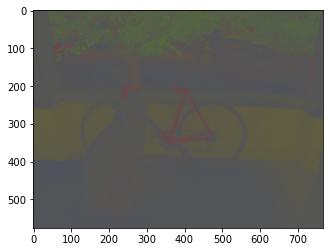

In [23]:
print("Module implementation")
m = nn.Softmax2d()
output = m(image_nchw)
print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

### Log-Softmax Function


20. nn.LogSoftmax - Applies the Log(Softmax(x)) function to an n-dimensional input Tensor. The LogSoftmax formulation can be simplified as
        
    Softmax Function - 

$$\text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)$$

In [24]:
print("Module implementation")
m = nn.LogSoftmax()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.log_softmax(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.0241, -2.3361,  1.5691,  1.4681,  0.6800,  0.5886, -0.4400,  0.0142,
         0.5242, -1.1499])
output =  tensor([-2.8952, -5.2072, -1.3020, -1.4029, -2.1911, -2.2824, -3.3110, -2.8569,
        -2.3468, -4.0210])


Functional implementation
output =  tensor([-2.8952, -5.2072, -1.3020, -1.4029, -2.1911, -2.2824, -3.3110, -2.8569,
        -2.3468, -4.0210])




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


# RoadMap 9 - Torch NN Layers - Linear, Dropout, Normalization, & Vision

    1.   torch.nn.layer                 - Applies a linear transformation to the incoming data
    2.   torch.nn.Bilinear              - Applies a bilinear transformation to the incoming data
    3.   torch.nn.Dropout               - During training, randomly zeroes some of the elements of the input tensor 
                                           with probability p using samples from a Bernoulli distribution. 
                                           The elements to zero are randomized on every forward call.
    4.   torch.nn.Droput2d              - Randomly zeroes whole channels of the input tensor. 
                                           The channels to zero-out are randomized on every forward call.
    5.   torch.nn.AlphaDropout          - Alpha Dropout is a type of Dropout that maintains the 
                                          self-normalizing property. 
    6.   torch.nn.BatchNorm1d           - Applies Batch Normalization over a 2D or 3D input
    7.   torch.nn.BatchNorm2d           - Applies Batch Normalization over a 4D input
    8.   torch.nn.GroupNorm             - Applies Group Normalization over a mini-batch of inputs as described 
                                           in the paper Group Normalization.
    9.   torch.nn.InstanceNorm1d        - Applies Instance Normalization over a 2D or 3D input 
    10.  torch.nn.InstanceNorm2d        - Applies Instance Normalization over a 4D input
    11.  torch.nn.LayerNorm             - Applies Layer Normalization over a mini-batch of inputs as described 
                                           in the paper Layer Normalization.
    12.  torch.nn.LocalResponseNorm     - Applies local response normalization over an input signal composed of 
                                           several input planes, where channels occupy the second dimension. 
                                           Applies normalization across channels.
    13.  torch.nn.UpsamplingNearest2d   - Applies a 2D nearest neighbor upsampling to an input signal composed of several 
            input channels.
    14.  torch.nn.UpsamplingBilinear2d  - Applies a 2D bilinear upsampling to an input signal composed of several 
                                           input channels.
            

In [25]:
import os
import sys
import torch
import numpy as np

In [26]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

# FUNCTIONAL modules - Implementing each module as functions
import torch.nn.functional as F

torch.Size([1, 3, 576, 768])


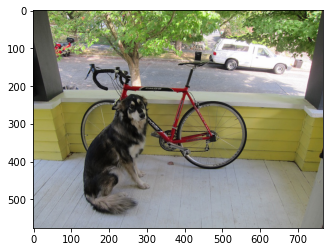

In [27]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

### Linear Layer


1. nn.Linear - Applies a linear transformation to the incoming data: 
     - weight – the learnable weights of the module of shape (out_features x in_features)
     - bias – the learnable bias of the module of shape (out_features)


$$y = xA^T + b$$




In [28]:
print("Module implementation")
m = nn.Linear(3, 30)
input_data = torch.randn(3,3)
output = m(input_data)

print("input shape = ", input_data.size())
print("output shape = ", output.size())
print("\n")

print("Functional implementation")
weight = torch.randn(30,3)
output = F.linear(input_data, weight, bias=None)
print("input shape = ", input_data.size())
print("output shape = ", output.size())
print("\n")

Module implementation
input shape =  torch.Size([3, 3])
output shape =  torch.Size([3, 30])


Functional implementation
input shape =  torch.Size([3, 3])
output shape =  torch.Size([3, 30])




### Bi-Linear Layer


2. nn.Bilinear - Applies a bilinear transformation to the incoming data: 
         - in1_features – size of each first input sample
         - in2_features – size of each second input sample
         - out_features – size of each output sample
         - bias – If set to False, the layer will not learn an additive bias. Default: True


$$y = x_1 A x_2 + b$$


In [29]:
print("Module implementation")
m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)

print("output shape = ", output.size())
print("\n")

print("Functional implementation")
weight = torch.randn(40,20,30)
output = F.bilinear(input1, input2, weight, bias=None)
print("input shape = ", input_data.size())
print("output shape = ", output.size())
print("\n")

Module implementation
output shape =  torch.Size([128, 40])


Functional implementation
input shape =  torch.Size([3, 3])
output shape =  torch.Size([128, 40])




## Extra Blog Resources

1. https://towardsdatascience.com/simplified-math-behind-dropout-in-deep-learning-6d50f3f47275
    
2. https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/dropout_layer.html

### Dropout Layer

3. nn.Dropout- During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. The elements to zero are randomized on every forward call.
    - p – probability of an element to be zeroed. Default: 0.5
    - inplace – If set to True, will do this operation in-place. Default: False




Module implementation
output shape =  torch.Size([1, 3, 576, 768])


Functional implementation
output shape =  torch.Size([1, 3, 576, 768])




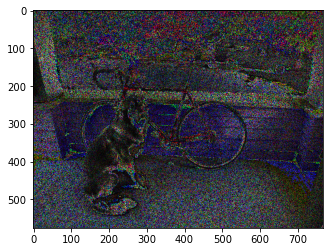

In [30]:
print("Module implementation")
m = nn.Dropout(p=0.6)
output = m(image_nchw)

print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.dropout(image_nchw, p=0.5, training=False, inplace=False)
print("output shape = ", output.size())
print("\n")

### Dropout-2D Layer

4. nn.Droput2d - Randomly zeroes whole channels of the input tensor. The channels to zero-out are randomized on every forward call.
    - p – probability of an element to be zeroed. Default: 0.5
    - inplace – If set to True, will do this operation in-place. Default: False


Module implementation
output shape =  torch.Size([1, 3, 576, 768])


Functional implementation
output shape =  torch.Size([1, 3, 576, 768])




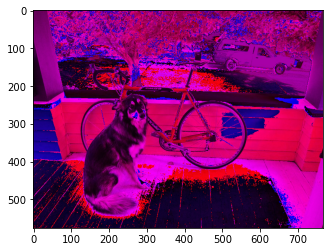

In [31]:
print("Module implementation")
m = nn.Dropout2d(p=0.4)
output = m(image_nchw)

print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.dropout2d(image_nchw, p=0.5, training=False, inplace=False)
print("output shape = ", output.size())
print("\n")

### Alpha - Dropout Layer

5. nn.AlphaDropout - Alpha Dropout is a type of Dropout that maintains the self-normalizing property. For an input with zero mean and unit standard deviation, the output of Alpha Dropout maintains the original mean and standard deviation of the input. Alpha Dropout goes hand-in-hand with SELU activation function, which ensures that the outputs have zero mean and unit standard deviation.
    - p – probability of an element to be zeroed. Default: 0.5
    - inplace – If set to True, will do this operation in-place. Default: False

Module implementation
output shape =  torch.Size([1, 3, 576, 768])


Functional implementation
output shape =  torch.Size([1, 3, 576, 768])




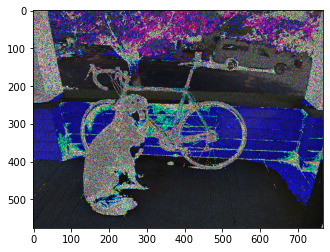

In [32]:
print("Module implementation")
m = nn.AlphaDropout(p=0.4)
output = m(image_nchw)

print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.alpha_dropout(image_nchw, p=0.5, training=False, inplace=False)
print("output shape = ", output.size())
print("\n")

## Extra Blog Resources

1. https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
    
2. https://analyticsindiamag.com/understanding-normalization-methods-in-deep-learning/

### 1D Batch Normalization

6. nn.BatchNorm1d - Applies Batch Normalization over a 2D or 3D input (a mini-batch of 1D inputs with optional additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
        - num_features – C from an expected input of size (N,C,L) or L from input of size (N,L)
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - momentum – the value used for the running_mean and running_var computation. Can be set to None for cumulative 
        - moving average (i.e. simple average). Default: 0.1
        - affine – a boolean value that when set to True, this module has learnable affine parameters. Default: True
        - track_running_stats – a boolean value that when set to True, this module tracks the running mean and variance, 
                and when set to False, this module does not track such statistics and always uses batch statistics in 
                both training and eval modes. Default: True

    Function:
$$y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$$

In [33]:
# With Learnable Parameters
print("Module Implementation")
m1 = nn.BatchNorm1d(3, momentum=0.1, eps=1e-05)
# Without Learnable Parameters
m2 = nn.BatchNorm1d(3, affine=False)
input_data = torch.randn(3, 3)
output = m1(input_data)

print("input_data = ", input_data)
print("output_data = ", output)
print("\n")

print("Functional implementation")
output = F.batch_norm(input_data, None, None, training=True, momentum=0.1, eps=1e-05)
print("output_data = ", output)
print("\n")


Module Implementation
input_data =  tensor([[ 0.5882, -0.8587,  0.9349],
        [ 1.7590,  0.6899,  0.6121],
        [ 0.4698,  0.5075, -1.7177]])
output_data =  tensor([[-0.6029, -1.4060,  0.8392],
        [ 1.4093,  0.8349,  0.5661],
        [-0.8064,  0.5711, -1.4054]], grad_fn=<NativeBatchNormBackward>)


Functional implementation
output_data =  tensor([[-0.6029, -1.4060,  0.8392],
        [ 1.4093,  0.8349,  0.5661],
        [-0.8064,  0.5711, -1.4054]])




### 2D Batch Normalization

7. nn.BatchNorm2d - Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
        - num_features – C from an expected input of size (N,C,L) or L from input of size (N,L)
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - momentum – the value used for the running_mean and running_var computation. Can be set to None for cumulative 
        - moving average (i.e. simple average). Default: 0.1
        - affine – a boolean value that when set to True, this module has learnable affine parameters. Default: True
        - track_running_stats – a boolean value that when set to True, this module tracks the running mean and variance, 
                and when set to False, this module does not track such statistics and always uses batch statistics in 
                both training and eval modes. Default: True

    Function:
$$y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$$

output shape =  torch.Size([1, 3, 576, 768])


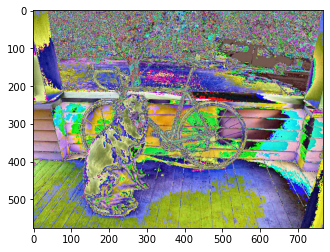

In [34]:
# With Learnable Parameters
m1 = nn.BatchNorm2d(3)
# Without Learnable Parameters
m2 = nn.BatchNorm2d(3, affine=False)
output = m2(image_nchw)

print("output shape = ", output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

### Group Normalization

8. nn.GroupNorm - Applies Group Normalization over a mini-batch of inputs as described in the paper Group Normalization.
        - num_groups (int) – number of groups to separate the channels into
        - num_channels (int) – number of channels expected in input
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - affine – a boolean value that when set to True, this module has learnable per-channel affine parameters. 
            Default: True


In [35]:
input_data = torch.randn(20, 6, 10, 10)
# Separate 6 channels into 3 groups
m1 = nn.GroupNorm(3, 6)

# Separate 6 channels into 6 groups (equivalent with InstanceNorm)
m2 = nn.GroupNorm(6, 6)

# Put all 6 channels into a single group (equivalent with LayerNorm)
m3 = nn.GroupNorm(1, 6)

# Activating the module
output = m1(input_data)

print("output shape = ", output.size())

output shape =  torch.Size([20, 6, 10, 10])


### 1D Instance Normalization

9. nn.InstanceNorm1d - Applies Instance Normalization over a 2D or 3D input (a mini-batch of 1D inputs with optional additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.
        - num_features – C from an expected input of size (N,C,L) or L from input of size (N,L)
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - momentum – the value used for the running_mean and running_var computation. Can be set to None for cumulative 
            moving average (i.e. simple average). Default: 0.1
        - affine – a boolean value that when set to True, this module has learnable affine parameters. Default: True
        - track_running_stats – a boolean value that when set to True, this module tracks the running mean and variance, 
                and when set to False, this module does not track such statistics and always uses batch statistics in 
                both training and eval modes. Default: True

    Function:
$$y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$$

In [36]:
# With Learnable Parameters
print("Module implementation")
m1 = nn.InstanceNorm1d(2)
# Without Learnable Parameters
m2 = nn.InstanceNorm1d(2, affine=False)
input_data = torch.randn(1, 3, 3)
output = m1(input_data)

print("input_data = ", input_data)
print("output_data = ", output)
print("\n")


print("Functional implementation")
output = F.instance_norm(input_data, None, None, momentum=0.1, eps=1e-05)
print("output_data = ", output)
print("\n")

Module implementation
input_data =  tensor([[[-1.5644, -2.2755, -0.7297],
         [ 1.0815,  0.0378,  0.6630],
         [ 0.0602, -1.0947,  0.6649]]])
output_data =  tensor([[[-0.0653, -1.1908,  1.2561],
         [ 1.1365, -1.2971,  0.1606],
         [ 0.2513, -1.3309,  1.0796]]])


Functional implementation
output_data =  tensor([[[-0.0653, -1.1908,  1.2561],
         [ 1.1365, -1.2971,  0.1606],
         [ 0.2513, -1.3309,  1.0796]]])




### 2D Instance Normalization

10. nn.InstanceNorm2d - Applies Instance Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.
        - num_features – C from an expected input of size (N,C,L) or L from input of size (N,L)
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - momentum – the value used for the running_mean and running_var computation. Can be set to None for cumulative 
        - moving average (i.e. simple average). Default: 0.1
        - affine – a boolean value that when set to True, this module has learnable affine parameters. Default: True
        - track_running_stats – a boolean value that when set to True, this module tracks the running mean and variance, 
                and when set to False, this module does not track such statistics and always uses batch statistics in 
                both training and eval modes. Default: True

    Function:
$$y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$$

output shape =  torch.Size([1, 3, 576, 768])


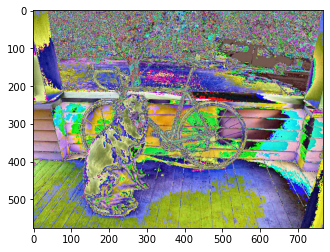

In [37]:
# With Learnable Parameters
m1 = nn.InstanceNorm2d(3)
# Without Learnable Parameters
m2 = nn.InstanceNorm2d(3, affine=False)
output = m2(image_nchw)

print("output shape = ", output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

### Layer Normalization

11. nn.LayerNorm - Applies Layer Normalization over a mini-batch of inputs as described in the paper Layer Normalization.
        - normalized_shape (int or list or torch.Size) –
        - eps – a value added to the denominator for numerical stability. Default: 1e-5
        - elementwise_affine – a boolean value that when set to True, this module has learnable per-element affine 
            parameters. Default: True

Module implementation
output shape =  torch.Size([1, 3, 576, 768])


Functional implementation
output shape =  torch.Size([1, 3, 576, 768])




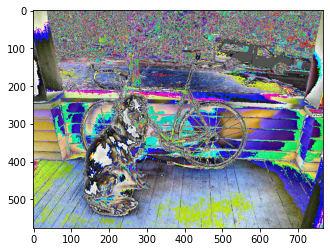

In [38]:
print("Module implementation")
m2 = nn.LayerNorm((1, 3, 576, 768))
output = m2(image_nchw)

print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.layer_norm(image_nchw, (1, 3, 576, 768), weight=None, bias=None, eps=1e-05)
print("output shape = ", output.size())
print("\n")

### Local response Normalization

12. nn.LocalResponseNorm - Applies local response normalization over an input signal composed of several input planes, where channels occupy the second dimension. Applies normalization across channels.
        - size – amount of neighbouring channels used for normalization
        - alpha – multiplicative factor. Default: 0.0001
        - beta – exponent. Default: 0.75
        - k – additive factor. Default: 1

    Function:
    
$$b_{c} = a_{c}\left(k + \frac{\alpha}{n}
\sum_{c'=\max(0, c-n/2)}^{\min(N-1,c+n/2)}a_{c'}^2\right)^{-\beta}$$

Module implementation
output shape =  torch.Size([1, 3, 576, 768])


Functional implementation
output shape =  torch.Size([1, 3, 576, 768])




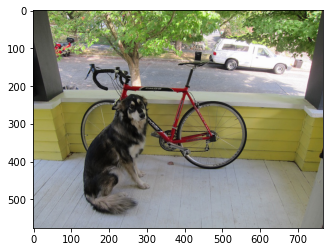

In [39]:
print("Module implementation")
m2 = nn.LocalResponseNorm(300)
output = m2(image_nchw)

print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.local_response_norm(image_nchw, size=300, alpha=0.0001, beta=0.75, k=1)
print("output shape = ", output.size())
print("\n")

### Upsampling 2D - Nearest Neighbour

13. nn.UpsamplingNearest2d - Applies a 2D nearest neighbor upsampling to an input signal composed of several input channels. To specify the scale, it takes either the size or the scale_factor as it’s constructor argument. When size is given, it is the output size of the image (h, w).
        - size (tuple, optional) – a tuple of ints (H_out, W_out) output sizes
        - scale_factor (int, optional) – the multiplier for the image height or width


Module implementation
input_shape =  torch.Size([1, 3, 576, 768])
output shape =  torch.Size([1, 3, 1152, 1536])


Functional implementation
input_shape =  torch.Size([1, 3, 576, 768])
output shape =  torch.Size([1, 3, 1152, 1536])




C:\ANACONDA\lib\site-packages\torch\nn\functional.py:3062: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


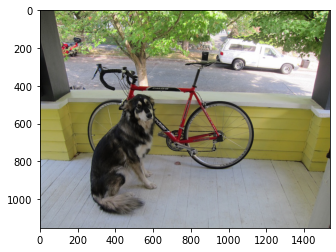

In [40]:
print("Module implementation")
m = nn.UpsamplingNearest2d(scale_factor=2)
output = m(image_nchw)

print("input_shape = ", image_nchw.size())
print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.upsample_nearest(image_nchw, scale_factor=2)
print("input_shape = ", image_nchw.size())
print("output shape = ", output.size())
print("\n")

### Upsampling 2D - Bilinear

14. nn.UpsamplingBilinear2d - Applies a 2D bilinear upsampling to an input signal composed of several input channels. To specify the scale, it takes either the size or the scale_factor as it’s constructor argument. When size is given, it is the output size of the image (h, w).
        - size (tuple, optional) – a tuple of ints (H_out, W_out) output sizes
        - scale_factor (int, optional) – the multiplier for the image height or width

Module implementation
input_shape =  torch.Size([1, 3, 576, 768])
output shape =  torch.Size([1, 3, 1152, 1536])


Functional implementation
input_shape =  torch.Size([1, 3, 576, 768])
output shape =  torch.Size([1, 3, 1152, 1536])




C:\ANACONDA\lib\site-packages\torch\nn\functional.py:3104: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


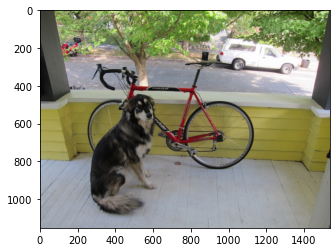

In [41]:
print("Module implementation")
m = nn.UpsamplingBilinear2d(scale_factor=2)
output = m(image_nchw)

print("input_shape = ", image_nchw.size())
print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

print("Functional implementation")
output = F.upsample_bilinear(image_nchw, scale_factor=2)
print("input_shape = ", image_nchw.size())
print("output shape = ", output.size())
print("\n")

# RoadMap 10 - Torch NN Layers - Initializers
    
    1.   torch.nn.init.calculate_gain   - Return the recommended gain value for the given nonlinearity function.
    2.   torch.nn.init.uniform_         - Fills the input Tensor with values drawn from the 
                                           uniform distribution U(a,b).
    3.   torch.nn.init.normal_          - Fills the input Tensor with values drawn from the normal 
                                           distribution N(mean,std).
    4.   torch.nn.init.constant_        - Fills the input Tensor with the value val.
    5.   torch.nn.init.eye_             - Fills the 2-dimensional input Tensor with the identity matrix. 
    6.   torch.nn.init.dirac_           - Fills the {3, 4, 5}-dimensional input Tensor with the Dirac 
                                           delta function.
    7.   torch.nn.init.xavier_uniform_  - Fills the input Tensor with values according to the method described 
                                           in “Understanding the difficulty of training deep feedforward 
                                           neural networks” - Glorot, X. & Bengio, Y. (2010), using a 
                                           uniform distribution.
    8.   torch.nn.init.xavier_normal_   - Fills the input Tensor with values according to the method described 
                                           in “Understanding the difficulty of training deep feedforward 
                                           neural networks” - Glorot, X. & Bengio, Y. (2010), using a 
                                           normal distribution. 
    9.   torch.nn.init.kaiming_uniform_ - Fills the input Tensor with values according to the method described 
                                           in “Delving deep into rectifiers: Surpassing human-level performance 
                                           on ImageNet classification” - He, K. et al. (2015), using a 
                                           uniform distribution. 
    10.  torch.nn.init.kaiming_normal_  - Fills the input Tensor with values according to the method described
                                           in “Delving deep into rectifiers: Surpassing human-level performance 
                                           on ImageNet classification” - He, K. et al. (2015), using a 
                                           normal distribution.
    11.  torch.nn.init.orthogonal_      - Fills the input Tensor with a (semi) orthogonal matrix, as described 
                                           in “Exact solutions to the nonlinear dynamics of learning in deep
                                           linear neural networks” - Saxe, A. et al. (2013). 
    12.  torch.nn.init.sparse_          - Fills the 2D input Tensor as a sparse matrix, where the non-zero 
                                           elements will be drawn from the normal distribution N(0,0.01), 
                                           as described in “Deep learning via Hessian-free 
                                           optimization” - Martens, J. (2010).



In [42]:
import os
import sys
import torch
import numpy as np

In [43]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

## Extra Blog Resources

1. https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
    
2. https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
    
3. https://medium.com/usf-msds/deep-learning-best-practices-1-weight-initialization-14e5c0295b94

torch.Size([1, 3, 576, 768])


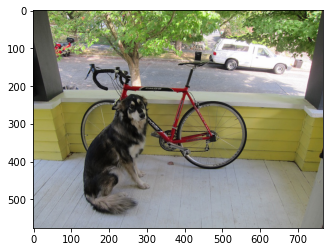

In [44]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

In [45]:
# Gain from non-linearity

'''
1. nn.init.calculate_gain - Return the recommended gain value for the given nonlinearity function.
        - nonlinearity – the non-linear function (nn.functional name)
        - param – optional parameter for the non-linear function
'''

gain_leaky_relu = nn.init.calculate_gain('leaky_relu')
gain_conv2d = nn.init.calculate_gain('conv2d')

print("Gain of Leaky ReLU - ", gain_leaky_relu)
print("Gain of Convolution 2d - ", gain_conv2d)

Gain of Leaky ReLU -  1.4141428569978354
Gain of Convolution 2d -  1


In [46]:
# Uniform Filler function

'''
2. nn.init.uniform_ - Fills the input Tensor with values drawn from the uniform distribution U(a,b).
        - tensor – an n-dimensional torch.Tensor
        - a – the lower bound of the uniform distribution
        - b – the upper bound of the uniform distribution
'''

w = torch.empty(3, 5)
w = nn.init.uniform_(w, a=2, b=5)

print("w = ", w)

w =  tensor([[3.0505, 2.0326, 3.6770, 2.0914, 2.0822],
        [2.7805, 2.7688, 4.2380, 3.8268, 2.9794],
        [4.0090, 3.1319, 4.9105, 3.6911, 2.1176]])


In [47]:
# Normal filler function

'''
3. nn.init.normal_ - Fills the input Tensor with values drawn from the normal distribution N(mean,std).
        - tensor – an n-dimensional torch.Tensor
        - mean – the mean of the normal distribution
        - std – the standard deviation of the normal distribution
'''

w = torch.empty(3, 5)
w = nn.init.uniform_(w, 0.0, 1.0)

print("w = ", w)

w =  tensor([[0.4702, 0.9139, 0.7761, 0.5644, 0.9413],
        [0.3386, 0.7673, 0.8783, 0.7035, 0.2044],
        [0.9591, 0.3630, 0.4820, 0.9697, 0.7488]])


In [48]:
# Constant filler function

'''
4. nn.init.constant_ - Fills the input Tensor with the value val.
        - tensor – an n-dimensional torch.Tensor
        - val – the value to fill the tensor with
'''
w = torch.empty(3, 5)
w = nn.init.constant_(w, 1.5)

print("w = ", w)

w =  tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]])


In [49]:
# Eye filler function

'''
5. nn.init.eye_ - Fills the 2-dimensional input Tensor with the identity matrix. 
    Preserves the identity of the inputs in Linear layers, where as many inputs are preserved as possible.
'''

w = torch.empty(3, 5)
w = nn.init.eye_(w)

print("w = ", w)

w =  tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])


In [50]:
# Dirac delta filler function

'''
6. nn.init.dirac_ - Fills the {3, 4, 5}-dimensional input Tensor with the Dirac delta function.
'''

w = torch.empty(1, 3, 5)
w = nn.init.dirac_(w)

print("w = ", w)

w =  tensor([[[0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])


In [51]:
# Xavier uniform filler function

'''
7. nn.init.xavier_uniform_ - Fills the input Tensor with values according to the method described in “Understanding the 
    difficulty of training deep feedforward neural networks” - Glorot, X. & Bengio, Y. (2010), using a uniform distribution.
'''

w = torch.empty(3, 5)
w = nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))

print("w = ", w)

w =  tensor([[ 1.0669,  0.3836,  0.8302,  1.1928,  0.6660],
        [ 1.1049,  0.0442,  1.1052,  1.0361, -0.6009],
        [ 1.1110, -0.2613, -0.1352,  0.8030, -0.1447]])


In [52]:
# Xavier normal filler function

'''
8. nn.init.xavier_normal_ - Fills the input Tensor with values according to the method described in “Understanding the 
    difficulty of training deep feedforward neural networks” - Glorot, X. & Bengio, Y. (2010), using a normal distribution. 
'''

w = torch.empty(3, 5)
w = nn.init.xavier_normal_(w, gain=nn.init.calculate_gain('leaky_relu'))

print("w = ", w)

w =  tensor([[-0.2802, -0.6577, -3.1853,  0.1596,  0.3782],
        [-0.3876, -0.5277, -0.0827, -0.2763,  1.5225],
        [ 0.9698, -0.3542, -0.7373, -0.1529,  0.6035]])


In [53]:
# Kaming uniform filler function

'''
9. nn.init.kaiming_uniform_ - Fills the input Tensor with values according to the method described in “Delving deep 
    into rectifiers: Surpassing human-level performance on ImageNet classification” - He, K. et al. (2015), 
    using a uniform distribution. 
            - tensor – an n-dimensional torch.Tensor
            - a – the negative slope of the rectifier used after this layer (0 for ReLU by default)
            - mode – either ‘fan_in’ (default) or ‘fan_out’. Choosing fan_in preserves the magnitude of the variance 
                 of the weights in the forward pass. Choosing fan_out preserves the magnitudes in the backwards pass.
            - nonlinearity – the non-linear function (nn.functional name), recommended to use only with 
                ‘relu’ or ‘leaky_relu’ (default).

'''

w = torch.empty(3, 5)
w = nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu')

print("w = ", w)

w =  tensor([[-1.0804,  0.0022,  0.4724,  0.4540,  0.0068],
        [-0.3373, -0.5859,  0.9348, -0.5485,  0.2887],
        [-0.4209, -0.9735,  0.2217, -0.6276,  0.2082]])


In [54]:
# Kaming normal filler function

'''
10. nn.init.kaiming_normal_ - Fills the input Tensor with values according to the method described in “Delving deep 
        into rectifiers: Surpassing human-level performance on ImageNet classification” - 
        He, K. et al. (2015), using a normal distribution. 
            - tensor – an n-dimensional torch.Tensor
            - a – the negative slope of the rectifier used after this layer (0 for ReLU by default)
            - mode – either ‘fan_in’ (default) or ‘fan_out’. Choosing fan_in preserves the magnitude of the variance 
                 of the weights in the forward pass. Choosing fan_out preserves the magnitudes in the backwards pass.
            - nonlinearity – the non-linear function (nn.functional name), recommended to use only with 
                ‘relu’ or ‘leaky_relu’ (default).

'''

w = torch.empty(3, 5)
w = nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')

print("w = ", w)

w =  tensor([[ 0.7387,  0.8625, -0.2273,  0.0566,  0.6509],
        [-0.2152, -0.7393, -0.5015,  0.0764,  0.3247],
        [ 1.2751,  0.7019,  0.7920,  0.3230, -1.0017]])


In [55]:
# Orthogonal filler function

'''
11. torch.nn.init.orthogonal_ - Fills the input Tensor with a (semi) orthogonal matrix, as described in 
        “Exact solutions to the nonlinear dynamics of learning in deep linear neural networks” - Saxe, A. et al. (2013). 
            - tensor – an n-dimensional torch.Tensor, where n≥2
            - gain – optional scaling factor
'''

w = torch.empty(3, 5)
w = nn.init.orthogonal_(w)

print("w = ", w)


w =  tensor([[-0.9279, -0.0235,  0.1597,  0.3335,  0.0407],
        [ 0.0881, -0.7720,  0.0157,  0.1077,  0.6200],
        [-0.0068,  0.0875,  0.8726, -0.4509,  0.1661]])


In [56]:
# Sparse filler function

'''
12. nn.init.sparse_ - Fills the 2D input Tensor as a sparse matrix, where the non-zero elements will be drawn 
    from the normal distribution N(0,0.01), as described in “Deep learning via Hessian-free optimization” 
    - Martens, J. (2010).
        - tensor – an n-dimensional torch.Tensor
        - sparsity – The fraction of elements in each column to be set to zero
        - std – the standard deviation of the normal distribution used to generate the non-zero values

'''

w = torch.empty(3, 5)
w = nn.init.sparse_(w, sparsity=0.2)

print("w = ", w)

w =  tensor([[ 0.0105,  0.0052,  0.0000, -0.0033,  0.0044],
        [ 0.0000,  0.0000, -0.0055, -0.0072,  0.0000],
        [ 0.0019, -0.0196,  0.0032,  0.0000,  0.0115]])


# RoadMap 11 - Torch NN Layers - Loss Functions

    1.   torch.nn.L1Loss                     - L1 Loss Function
    2.   torch.nn.MSELoss                    - Mean Square Error Loss Function
    3.   torch.nn.CrossEntropyLoss           - Cross entropy loss function
    4.   torch.nn.NLLLoss                    - Negative Log Likelihood loss function
    5.   torch.nn.PoissonNLLLoss             - Poisson Negative Log Likelihood loss function
    6.   torch.nn.nn.KLDivLoss               - Kullback Leiber Divergence loss function
    7.   torch.nn.BCELoss                    - Binary cross entropy loss function
    8.   torch.BCEWithLogitsLoss             - Binary cross entropy loss with logits function
    9.   torch.nn.MarginRankingLoss          - Margin ranking loss function
    10.  torch.nn.HingeEmbeddingLoss         - Hinge Embedding Loss function
    11.  torch.nn.MultiLabelMarginLoss       - Multi Label Margin loss function
    12.  torch.nn.SmoothL1Loss               - Smooth L1 Loss function
    13.  torch.nn.MultiLabelSoftMarginLoss   - Multi Label Soft Margin Loss function
    14.  torch.nn.CosineEmbeddingLoss        - Cosine Embedding loss function
    15.  torch.nn.MultiMarginLoss            - Multi Margin loss function
    16.  torch.nn.TripletMarginLoss          - Triplet Margin Loss Function

In [57]:
import os
import sys
import torch
import numpy as np

In [58]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

# FUNCTIONAL modules - Implementing each module as functions
import torch.nn.functional as F

## Extra Blog Layers

1. https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7
    
2. https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

3. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

torch.Size([1, 3, 576, 768])


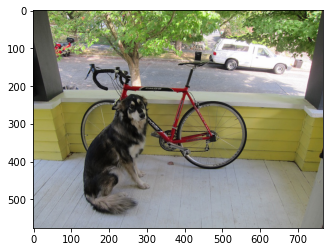

In [59]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

### L1 loss Function


1. nn.L1Loss - Creates a criterion that measures the mean absolute value of the element-wise difference between input x and target y
            - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
            - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
            - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’



    Function
    
$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = \left| x_n - y_n \right|$$

In [60]:
print("Module implementation")
loss = nn.L1Loss()
input_data = torch.randn(10, requires_grad=True)
target_data = torch.randn(10)
output_loss = loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.l1_loss(input_data, target_data, reduction='elementwise_mean')
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([-0.9304,  0.8715, -0.3489, -0.5670, -0.7432,  2.3781,  1.8587, -0.2812,
         0.9798, -1.5981], requires_grad=True)
Output Loss =  tensor(0.8526, grad_fn=<L1LossBackward>)


Functional implementation
Output Loss =  tensor(0.8526, grad_fn=<L1LossBackward>)




C:\ANACONDA\lib\site-packages\torch\nn\_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


### Mean Square Error Loss

2. nn.MSELoss - Creates a criterion that measures the mean squared error between n elements in the input x and target y.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’
        
        
    Function:
$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = \left( x_n - y_n \right)^2$$

In [61]:
print("Module implementation")
loss = nn.MSELoss()
input_data = torch.randn(10, requires_grad=True)
target_data = torch.randn(10)
output_loss = loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.mse_loss(input_data, target_data, reduction='elementwise_mean')
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([ 0.5633, -0.8774,  0.5116, -3.0182, -0.3011,  1.4770, -0.9535, -1.1811,
         0.1556, -0.5213], requires_grad=True)
Output Loss =  tensor(2.1098, grad_fn=<MseLossBackward>)


Functional implementation
Output Loss =  tensor(2.1098, grad_fn=<MseLossBackward>)




### Cross Entropy Loss

3. nn.CrossEntropyLoss - This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class. It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.
    - weight (Tensor, optional) – a manual rescaling weight given to each class. If given, has to be a Tensor of size C
    - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
    - ignore_index (int, optional) – Specifies a target value that is ignored and does not contribute to the input gradient. When size_average is True, the loss is averaged over non-ignored targets.
    - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
    - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’
    
      Function:

$$ \text{loss}(x, class) = weight[class] \left(-x[class] + \log\left(\sum_j \exp(x[j])\right)\right) $$


In [62]:
print("Module Implementation")
loss = nn.CrossEntropyLoss()
softmax = nn.Softmax()
input_data = torch.randn(3, 4, requires_grad=True)
input_data = softmax(input_data)
target_data = torch.tensor([0, 1, 2])
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")


print("Functional implementation")
output_loss = F.cross_entropy(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")


Module Implementation
Input Data =  tensor([[0.0906, 0.2144, 0.0851, 0.6100],
        [0.3865, 0.3038, 0.1313, 0.1785],
        [0.1803, 0.2348, 0.3118, 0.2731]], grad_fn=<SoftmaxBackward>)


Target Data =  tensor([0, 1, 2])


Output Loss =  tensor(1.4111, grad_fn=<NllLossBackward>)




Functional implementation
Output Loss =  tensor(1.4111, grad_fn=<NllLossBackward>)




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


### Negative log likelihood loss

4. nn.NLLLoss - The negative log likelihood loss. It is useful to train a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

    - weight (Tensor, optional) – a manual rescaling weight given to each class. If given, it has to be a Tensor of size C. Otherwise, it is treated as if having all ones.
    - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
    - ignore_index (int, optional) – Specifies a target value that is ignored and does not contribute to the input gradient. When size_average is True, the loss is averaged over non-ignored targets.
    - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
    - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’

    Function:

$$\begin{split}\ell(x, y) = \begin{cases}
    \sum_{n=1}^N \frac{1}{\sum_{n=1}^N w_{y_n}} l_n, & \text{if}\;
    \text{size_average} = \text{True},\\
    \sum_{n=1}^N l_n,  & \text{if}\;
    \text{size_average} = \text{False}.
\end{cases}\end{split}
$$

In [63]:
print("Module Implementation")
m = nn.LogSoftmax()
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input_data = torch.randn(3, 10, requires_grad=True)
input_data = m(input_data)
# each element in target has to have 0 <= value < C
target_data = torch.tensor([1, 0, 4])
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)


print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")


print("Functional implementation")
output_loss = F.nll_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module Implementation
Input Data =  tensor([[-3.4579, -2.1335, -0.6288, -3.9711, -3.1743, -1.6759, -4.2445, -4.7561,
         -3.4058, -4.3486],
        [-3.1430, -1.4165, -1.6339, -2.7609, -1.8419, -4.0355, -1.9346, -3.0079,
         -3.1769, -3.1213],
        [-3.3162, -3.0114, -3.9851, -1.1666, -2.6406, -2.8746, -1.8749, -2.3088,
         -1.8943, -2.9276]], grad_fn=<LogSoftmaxBackward>)


Target Data =  tensor([1, 0, 4])


Output Loss =  tensor(2.6390, grad_fn=<NllLossBackward>)




Functional implementation
Output Loss =  tensor(2.6390, grad_fn=<NllLossBackward>)




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


### Poisson Negative log likelihood loss

5. nn.PoissonNLLLoss - Negative log likelihood loss with Poisson distribution of target.
        - log_input (bool, optional) – if True the loss is computed as exp(input)−target∗input, if False the loss is input−target∗log(input+eps)
        - full (bool, optional) – whether to compute full loss, i. e. to add the Stirling approximation term target∗log(target)−target+0.5∗log(2πtarget).
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - eps (float, optional) – Small value to avoid evaluation of log(0), when log_input == False. Default: 1e-8
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’
        
    Function:

$$\begin{align}\begin{aligned}\text{target} \sim \mathrm{Poisson}(\text{input})\\\text{loss}(\text{input}, \text{target}) = \text{input} - \text{target} * \log(\text{input})
                            + \log(\text{target!})\end{aligned}\end{align}$$


In [64]:
print("Module Implementation")
loss = nn.PoissonNLLLoss()
input_data = torch.randn(5, 2, requires_grad=True)
target_data = torch.randn(5, 2)
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)


print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.poisson_nll_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module Implementation
Input Data =  tensor([[-0.1600,  0.9476],
        [ 1.9107, -0.8136],
        [-0.3840,  0.3023],
        [ 0.6485, -0.6268],
        [ 0.6290,  0.4992]], requires_grad=True)


Target Data =  tensor([[ 2.2071, -0.4597],
        [ 0.8626, -1.4779],
        [ 0.8096,  0.6633],
        [ 0.1601,  1.9187],
        [-0.2822, -1.1112]])


Output Loss =  tensor(1.8516, grad_fn=<MeanBackward0>)




Functional implementation
Output Loss =  tensor(1.8516, grad_fn=<MeanBackward0>)




### Kullback Leiber Divergence loss

6. nn.KLDivLoss - KL divergence is a useful distance measure for continuous distributions and is often useful when performing direct regression over the space of (discretely sampled) continuous output distributions.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’


In [65]:
print("Module Implementation")
loss = nn.KLDivLoss(size_average=False)
log_softmax = nn.LogSoftmax(1)
softmax = nn.Softmax(1)

batch_size = 2

input_data = torch.randn(batch_size, 3, requires_grad=True)
log_input_data = log_softmax(input_data)

target_data = torch.randn(batch_size, 3, requires_grad=True)
softmax_target_data = softmax(target_data)

output_loss = loss(log_input_data, softmax_target_data) / batch_size
output_loss.backward(retain_graph=True)

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.kl_div(log_input_data, softmax_target_data, size_average=False) / batch_size
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module Implementation
Input Data =  tensor([[ 0.2322, -0.1526, -1.0370],
        [ 1.2443,  0.8913, -0.5717]], requires_grad=True)


Target Data =  tensor([[-1.3962e+00, -1.4781e-03, -2.3646e+00],
        [-9.5763e-01, -2.8430e-01, -1.0306e+00]], requires_grad=True)


Output Loss =  tensor(0.2653, grad_fn=<DivBackward0>)




Functional implementation
Output Loss =  tensor(0.2653, grad_fn=<DivBackward0>)




C:\ANACONDA\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


### Binary Cross Entripy Loss

7. nn.BCELoss - Creates a criterion that measures the Binary Cross Entropy between the target and the output
        - weight (Tensor, optional) – a manual rescaling weight given to the loss of each batch element. If given, has to be a Tensor of size “nbatch”.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’

        
        
   Function:
   
$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]$$

In [66]:
print("Module Implementation")
loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

input_data = torch.randn(5, requires_grad=True)
sigmoid_input_data = sigmoid(input_data) 

target_data = torch.empty(5).random_(2) # Binary Target

output_loss = loss(sigmoid_input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.binary_cross_entropy(sigmoid_input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")



Module Implementation
Input Data =  tensor([ 0.5076,  0.4062,  1.6572, -0.6406,  0.6638], requires_grad=True)


Target Data =  tensor([1., 0., 0., 1., 0.])


Output Loss =  tensor(1.0726, grad_fn=<BinaryCrossEntropyBackward>)




Functional implementation
Output Loss =  tensor(1.0726, grad_fn=<BinaryCrossEntropyBackward>)




### Binary Cross Entropy with Logits Loss

8. nn.BCEWithLogitsLoss - This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.
        - weight (Tensor, optional) – a manual rescaling weight given to the loss of each batch element. If given, has to be a Tensor of size “nbatch”.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’
        - pos_weight – a weight of positive examples. Must be a vector with length equal to the number of classes.



    Function
    
$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
l_n = - w_n \left[ t_n \cdot \log \sigma(x_n)
+ (1 - t_n) \cdot \log (1 - \sigma(x_n)) \right]$$

In [67]:
print("Module implementation")
loss = nn.BCEWithLogitsLoss()
sigmoid = nn.Sigmoid()

input_data = torch.randn(5, requires_grad=True)
sigmoid_input_data = sigmoid(input_data) 

target_data = torch.empty(5).random_(2) # Binary Target

output_loss = loss(sigmoid_input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.binary_cross_entropy_with_logits(sigmoid_input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([ 2.2055,  0.1714, -0.9756, -1.4460,  2.4637], requires_grad=True)


Target Data =  tensor([1., 0., 1., 0., 1.])


Output Loss =  tensor(0.6071, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)




Functional implementation
Output Loss =  tensor(0.6071, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)




### Margin Ranking Loss

9. nn.MarginRankingLoss - Creates a criterion that measures the loss given inputs x1, x2, two 1D mini-batch Tensor's, and a label 1D mini-batch tensor 'y with values (1 or -1). If y == 1 then it assumed the first input should be ranked higher (have a larger value) than the second input, and vice-versa for y == -1.
        - margin (float, optional) – Has a default value of 0.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’


    Function:

$$\text{loss}(x, y) = \max(0, -y * (x1 - x2) + \text{margin})$$


In [68]:
print("Module implementation")
loss = nn.MarginRankingLoss()
input_data1 = torch.randn(3, requires_grad=True)
input_data2 = torch.randn(3, requires_grad=True)
target_data = torch.tensor([-1., 1., 1.])
output_loss = loss(input_data1, input_data2, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data1 = ", input_data1)
print("\n")
print("Input Data2 = ", input_data2)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.margin_ranking_loss(input_data1, input_data2, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data1 =  tensor([-0.0719, -0.2789, -0.0980], requires_grad=True)


Input Data2 =  tensor([ 1.0681,  0.3308, -1.5730], requires_grad=True)


Target Data =  tensor([-1.,  1.,  1.])


Output Loss =  tensor(0.2032, grad_fn=<MeanBackward0>)




Functional implementation
Output Loss =  tensor(0.2032, grad_fn=<MeanBackward0>)




### Hinge Embedding Loss

10. nn.HingeEmbeddingLoss - Measures the loss given an input tensor x and a labels tensor y containing values (1 or -1). This is usually used for measuring whether two inputs are similar or dissimilar, e.g. using the L1 pairwise distance as x, and is typically used for learning nonlinear embeddings or semi-supervised learning.
        - margin (float, optional) – Has a default value of 1.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’

        
        

    Function:
$$\begin{split}l_n = \begin{cases}
    x_n, & \text{if}\; y_n = 1,\\
    \max \{0, \Delta - x_n\}, & \text{if}\; y_n = -1,
\end{cases}\end{split}$$

In [69]:
print("Module implementation")
loss = nn.HingeEmbeddingLoss()
input_data = torch.randn(3, requires_grad=True)
target_data = torch.tensor([-1., 1., 1.])
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.hinge_embedding_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([-1.3565, -0.1457,  1.1994], requires_grad=True)


Target Data =  tensor([-1.,  1.,  1.])


Output Loss =  tensor(1.1367, grad_fn=<MeanBackward0>)




Functional implementation
Output Loss =  tensor(1.1367, grad_fn=<MeanBackward0>)




### Multi Label Margin Loss

11. nn.MultiLabelMarginLoss - Creates a criterion that optimizes a multi-class multi-classification hinge loss (margin-based loss) between input x (a 2D mini-batch Tensor) and output y (which is a 2D Tensor of target class indices). For each sample in the mini-batch
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’





    Function:
    
$$\text{loss}(x, y) = \sum_{ij}\frac{\max(0, 1 - (x[y[j]] - x[i]))}{\text{x.size}(0)}$$

In [70]:
print("Module implementation")
loss = nn.MultiLabelMarginLoss()
softmax = nn.Softmax()

input_data = torch.randn(3, requires_grad=True)
input_data = softmax(input_data)

target_data = torch.tensor([0, 1, 2])
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.multilabel_margin_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([0.2310, 0.7067, 0.0624], grad_fn=<SoftmaxBackward>)


Target Data =  tensor([0, 1, 2])


Output Loss =  tensor(0., grad_fn=<MultilabelMarginLossBackward>)




Functional implementation
Output Loss =  tensor(0., grad_fn=<MultilabelMarginLossBackward>)




C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


### Smooth L1 Loss

12. nn.SmoothL1Loss - Creates a criterion that uses a squared term if the absolute element-wise error falls below 1 and an L1 term otherwise. It is less sensitive to outliers than the MSELoss and in some cases prevents exploding gradients (e.g. see “Fast R-CNN” paper by Ross Girshick). 
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’




    Function:

$$\text{loss}(x, y) = \frac{1}{n} \sum_{i} z_{i}$$

Where, $$z_{i}\text{ is }$$ 

\begin{split}z_{i} =
\begin{cases}
0.5 (x_i - y_i)^2, & \text{if } |x_i - y_i| < 1 \\
|x_i - y_i| - 0.5, & \text{otherwise }
\end{cases}\end{split}

In [71]:
print("Module implementation")
loss = nn.SmoothL1Loss()
input_data = torch.randn(3, requires_grad=True)
target_data = torch.randn(3, requires_grad=False)
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph=True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.smooth_l1_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([-0.8858, -0.2159, -0.7021], requires_grad=True)


Target Data =  tensor([-1.1958, -0.1220, -2.0096])


Output Loss =  tensor(0.2867, grad_fn=<SmoothL1LossBackward>)




Functional implementation
Output Loss =  tensor(0.2867, grad_fn=<SmoothL1LossBackward>)




### Multi Label Soft Margin loss

13. nn.MultiLabelSoftMarginLoss - Creates a criterion that optimizes a multi-label one-versus-all loss based on max-entropy, between input x and target y of size (N, C)
        - weight (Tensor, optional) – a manual rescaling weight given to each class. If given, it has to be a Tensor of size C. Otherwise, it is treated as if having all ones.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’



    Function:

$$loss(x, y) = - \sum_i y[i] * \log((1 + \exp(-x[i]))^{-1})
                 + (1-y[i]) * \log\left(\frac{\exp(-x[i])}{(1 + \exp(-x[i]))}\right)
$$

In [72]:
print("Module implementation")
loss = nn.MultiLabelSoftMarginLoss()
input_data = torch.randn((1, 3), requires_grad=True)
target_data = torch.randn((1, 3), requires_grad=True)
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph = True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.multilabel_soft_margin_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Input Data =  tensor([[-1.5168,  0.5557, -0.4478]], requires_grad=True)


Target Data =  tensor([[-0.6321,  0.2688, -0.3363]], requires_grad=True)


Output Loss =  tensor(0.1476, grad_fn=<MeanBackward0>)




Functional implementation
Output Loss =  tensor(0.1476, grad_fn=<MeanBackward0>)




### Cosine Embedding Loss

14. nn.CosineEmbeddingLoss - Creates a criterion that measures the loss given input tensors x1, x2 and a Tensor label y with values 1 or -1. This is used for measuring whether two inputs are similar or dissimilar, using the cosine distance, and is typically used for learning nonlinear embeddings or semi-supervised learning.
        - margin (float, optional) – Should be a number from -1 to 1, 0 to 0.5 is suggested. If margin is missing, the default value is 0.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’


    Function:

$$\begin{split}\text{loss}(x, y) =
\begin{cases}
1 - \cos(x_1, x_2), & \text{if } y == 1 \\
\max(0, \cos(x_1, x_2) - \text{margin}), & \text{if } y == -1
\end{cases}\end{split}
$$

In [73]:
print("Module Implementation")
loss = nn.CosineEmbeddingLoss()

input_data1 = torch.randn(3, 3, requires_grad=True)
input_data2 = torch.randn(3, 3, requires_grad=True)
target_data = torch.tensor([-1., 1., 1.])
output_loss = loss(input_data1, input_data2, target_data)
output_loss.backward(retain_graph = True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data1 = ", input_data1)
print("\n")
print("Input Data2 = ", input_data2)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.cosine_embedding_loss(input_data1, input_data2, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module Implementation
Input Data1 =  tensor([[-0.3364, -0.5990, -2.2838],
        [ 0.8656,  0.9754, -0.9002],
        [-1.7505,  0.8191,  0.1676]], requires_grad=True)


Input Data2 =  tensor([[ 0.4920, -0.8281, -0.5203],
        [ 0.9289, -0.8304, -2.0162],
        [-0.4767, -0.2822, -1.3799]], requires_grad=True)


Target Data =  tensor([-1.,  1.,  1.])


Output Loss =  tensor(0.6570, grad_fn=<MeanBackward0>)




Functional implementation
Output Loss =  tensor(0.6570, grad_fn=<MeanBackward0>)




### Multi margin loss

15. nn.MultiMarginLoss - Creates a criterion that optimizes a multi-class classification hinge loss (margin-based loss) between input x (a 2D mini-batch Tensor) and output y (which is a 1D tensor of target class indices, 0≤y≤x.size(1))
        - p (int, optional) – Has a default value of 1. 1 and 2 are the only supported values
        - margin (float, optional) – Has a default value of 1.
        - weight (Tensor, optional) – a manual rescaling weight given to each class. If given, it has to be a Tensor of size C. Otherwise, it is treated as if having all ones.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’


    Function:
    
$$\text{loss}(x, y) = \frac{\sum_i \max(0, \text{margin} - x[y] + x[i]))^p}{\text{x.size}(0)}$$

In [74]:
'''
print("Model Implementation")
loss = nn.MultiMarginLoss()
input_data = torch.randn(3, requires_grad=True)
target_data = torch.tensor([1, 2, 3], requires_grad=False)
output_loss = loss(input_data, target_data)
output_loss.backward(retain_graph = True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.

print("Input Data = ", input_data)
print("\n")
print("Target Data = ", target_data)
print("\n")
print("Output Loss = ", output_loss)
print("\n")
print("\n")

print("Functional implementation")
output_loss = F.multi_margin_loss(input_data, target_data)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")
'''

'\nprint("Model Implementation")\nloss = nn.MultiMarginLoss()\ninput_data = torch.randn(3, requires_grad=True)\ntarget_data = torch.tensor([1, 2, 3], requires_grad=False)\noutput_loss = loss(input_data, target_data)\noutput_loss.backward(retain_graph = True)    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.\n\nprint("Input Data = ", input_data)\nprint("\n")\nprint("Target Data = ", target_data)\nprint("\n")\nprint("Output Loss = ", output_loss)\nprint("\n")\nprint("\n")\n\nprint("Functional implementation")\noutput_loss = F.multi_margin_loss(input_data, target_data)\noutput_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.\nprint("Output Loss = ", output_loss)\nprint("\n")\n'

### Triplet Margin Loss

16. nn.TripletMarginLoss - Creates a criterion that measures the triplet loss given an input tensors x1, x2, x3 and a margin with a value greater than 0. This is used for measuring a relative similarity between samples.
        - margin (float, optional) – Default: 1.
        - p (int, optional) – The norm degree for pairwise distance. Default: 2.
        - swap (float, optional) – The distance swap is described in detail in the paper Learning shallow convolutional feature descriptors with triplet losses by V. Balntas, E. Riba et al. Default: False.
        - size_average (bool, optional) – Deprecated (see reduction). By default, the losses are averaged over each loss element in the batch. Note that for some losses, there multiple elements per sample. If the field size_average is set to False, the losses are instead summed for each minibatch. Ignored when reduce is False. Default: True
        - reduce (bool, optional) – Deprecated (see reduction). By default, the losses are averaged or summed over observations for each minibatch depending on size_average. When reduce is False, returns a loss per batch element instead and ignores size_average. Default: True
        - reduction (string, optional) – Specifies the reduction to apply to the output: ‘none’ | ‘elementwise_mean’ | ‘sum’. ‘none’: no reduction will be applied, ‘elementwise_mean’: the sum of the output will be divided by the number of elements in the output, ‘sum’: the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: ‘elementwise_mean’


    Function:
    
$$L(a, p, n) = \max \{d(a_i, p_i) - d(a_i, n_i) + {\rm margin}, 0\}
\text{where,}
d(x_i, y_i) = \left\lVert {\bf x}_i - {\bf y}_i \right\rVert_p$$

In [75]:

print("Module implementation")
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
input_data1 = torch.randn(100, 128, requires_grad=True)
input_data2 = torch.randn(100, 128, requires_grad=True)
input_data3 = torch.randn(100, 128, requires_grad=True)
output = triplet_loss(input_data1, input_data2, input_data3)
output.backward(retain_graph = True)

print("Output Loss = ", output_loss)
print("\n")

print("Functional implementation")
output_loss = F.triplet_margin_loss(input_data1, input_data2, input_data3, margin=1.0, p=2)
output_loss.backward()    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
print("Output Loss = ", output_loss)
print("\n")

Module implementation
Output Loss =  tensor(0.6570, grad_fn=<MeanBackward0>)


Functional implementation
Output Loss =  tensor(1.2859, grad_fn=<MeanBackward0>)




# RoadMap 13 - Torch NN - Optimizers and handling Learning rate

    To use torch.optim you have to construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients.

    To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.
    
    
## Contents
    
    1. Adding parameters to optimizers
    2. Taking an optimization step
    3. Base optimizer class
    4. Optimizers
            4.1.  Adadelta
            4.2.  Adagrad
            4.3.  Adam
            4.4.  Sparse Adam
            4.5.  Adamax
            4.6.  Averaged Storchastic Gradient Descent
            4.7.  Limited Memeory Broyden–Fletcher–Goldfarb–Shanno
            4.8.  RMSProp
            4.9.  Resilient backpropagation
    5. Adusting Learning rate
            5.1.  Lambda-LR
            5.2.  Step-LR
            5.3.  Multistep-LR
            5.4.  Exponential-LR
            5.5.  Cosine Annealing LR
            5.6.  Plateau-LR

In [76]:
import os
import sys
import torch
import numpy as np

In [77]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

## Extra Blog Resources

1. https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f
    
2. https://algorithmia.com/blog/introduction-to-optimizers

3. https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

4. https://www.deeplearningbook.org/contents/optimization.html

torch.Size([1, 3, 576, 768])


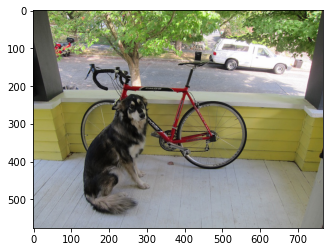

In [78]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

## Adding parameters to optimizers

    Optimizer s also support specifying per-parameter options. 
    
    To do this, instead of passing an iterable of Variable s, pass in an iterable of dicts. 
    
    Each of them will define a separate parameter group, and should contain a params key, containing a list of parameters belonging to it. 
    
    optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)


## Taking an optimization Step

    All optimizers implement a step() method, that updates the parameters.
    
    It can be dones as follows:
    
        optimizer.step()

## Base Optimizer class and function list

Class - torch.optim.Optimizer

Functions

    1. add_param_group - Add a param group to the Optimizer's param_groups. This can be useful when fine tuning a pre-trained network as frozen layers can be made trainable and added to the Optimizer as training progresses.
            - param_group (dict) – Specifies what Tensors should be optimized along with group
            
    2. load_state_dict - Loads the optimizer state.
            - state_dict (dict) – optimizer state. Should be an object returned from a call to state_dict()
            
    3. state_dict - Returns the state of the optimizer as a dict.
    
    4. step - Performs a single optimization step
             - closure (callable) – A closure that reevaluates the model and returns the loss. Optional for most optimizers.
             
    5. zero_grad - Clears the gradients of all optimized torch.Tensor s.
    


In [79]:
# Creating a sample model

import torch.nn as nn
import torch.nn.functional as F

'''
input -> conv2d -> relu -> conv2d -> relu -> output
'''
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))

In [80]:
model = Model()

In [81]:
# AdaDelta Optimizer

'''
1. torch.optim.Adadelta - Implements Adadelta algorithm.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - rho (float, optional) – coefficient used for computing a running average of squared gradients (default: 0.9)
        - eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-6)
        - lr (float, optional) – coefficient that scale delta before it is applied to the parameters (default: 1.0)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)
'''

adadelta_optim = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

In [82]:
# Adagrad Optimizers

'''
2. torch.optim.Adagrad - Implements Adagrad algorithm.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-2)
        - lr_decay (float, optional) – learning rate decay (default: 0)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

'''

adagrad_optim = torch.optim.Adagrad(model.parameters(), lr=1.0, lr_decay=0.001, weight_decay=0.00005)

In [83]:
# Adam Optimizers

'''
3. torch.optim.Adam - Implements Adam algorithm.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-3)
        - betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient and 
            its square (default: (0.9, 0.999))
        - eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)
        - amsgrad (boolean, optional) – whether to use the AMSGrad variant of this algorithm from the paper On the Convergence of Adam and Beyond

'''

adam_optim = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [84]:
# Sparse Adam Optimizers

'''
4. torch.optim.SparseAdam - Implements lazy version of Adam algorithm suitable for sparse tensors.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-3)
        - betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient 
            and its square (default: (0.9, 0.999))
        - eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)

'''

sparse_adam_optim = torch.optim.SparseAdam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

In [85]:
# Adamax Optimizers

'''
5. torch.optim.Adamax - Implements Adamax algorithm (a variant of Adam based on infinity norm). It has been proposed 
    in Adam: A Method for Stochastic Optimization.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 2e-3)
        - betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient and its square
        - eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

'''

adamax_optim = torch.optim.Adamax(model.parameters(), lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [86]:
# Averaged Stochastic Gradient Descent Optimizers

'''
6. torch.optim.ASGD - Implements Averaged Stochastic Gradient Descent. It has been proposed 
    in Acceleration of stochastic approximation by averaging.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-2)
        - lambd (float, optional) – decay term (default: 1e-4)
        - alpha (float, optional) – power for eta update (default: 0.75)
        - t0 (float, optional) – point at which to start averaging (default: 1e6)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

'''

asgd_optim = torch.optim.ASGD(model.parameters(), lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)

In [87]:
# Limited Memeory Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimizers

'''
7. torch.optim.LBFGS - Implements Limited Memeory Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm
        - lr (float) – learning rate (default: 1)
        - max_iter (int) – maximal number of iterations per optimization step (default: 20)
        - max_eval (int) – maximal number of function evaluations per optimization step (default: max_iter * 1.25).
        - tolerance_grad (float) – termination tolerance on first order optimality (default: 1e-5).
        - tolerance_change (float) – termination tolerance on function value/parameter changes (default: 1e-9).
        - history_size (int) – update history size (default: 100).

'''

lbgfs_optim = torch.optim.LBFGS(model.parameters(), lr=1, max_iter=20, max_eval=None, tolerance_grad=1e-05, \
                                tolerance_change=1e-09, history_size=100, line_search_fn=None)

In [88]:
# RMS-Prop optimizers

'''
8. torch.optim.RMSprop - Implements RMSprop algorithm.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-2)
        - momentum (float, optional) – momentum factor (default: 0)
        - alpha (float, optional) – smoothing constant (default: 0.99)
        - eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)
        - centered (bool, optional) – if True, compute the centered RMSProp, the gradient is normalized by an 
            estimation of its variance
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

'''

rmsprop_optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0,\
                                    centered=False)

In [89]:
# Resilient backpropagation Optimizers

'''
9. torch.optim.Rprop - Implements the resilient backpropagation algorithm.
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float, optional) – learning rate (default: 1e-2)
        - etas (Tuple[float, float], optional) – pair of (etaminus, etaplis), that are multiplicative increase and 
            decrease factors (default: (0.5, 1.2))
        - step_sizes (Tuple[float, float], optional) – a pair of minimal and maximal allowed step sizes 
            (default: (1e-6, 50))

'''


rprop_optim = torch.optim.Rprop(model.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

In [90]:
# Stochastic gradient descent Optimizers

'''
10. torch.optim.SGD - Implements stochastic gradient descent (optionally with momentum).
        - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
        - lr (float) – learning rate
        - momentum (float, optional) – momentum factor (default: 0)
        - weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)
        - dampening (float, optional) – dampening for momentum (default: 0)
        - nesterov (bool, optional) – enables Nesterov momentum (default: False)

'''

sgd_optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False)

## Extra Blog Resources

1. https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

2. https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

3. https://www.jeremyjordan.me/nn-learning-rate/

4. https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/

5. https://www.pyimagesearch.com/2019/07/22/keras-learning-rate-schedules-and-decay/

## Adjusting Learning Rate 

1. torch.optim.lr_scheduler provides several methods to adjust the learning rate based on the number of epochs.

2. torch.optim.lr_scheduler.ReduceLROnPlateau allows dynamic learning rate reducing based on some validation measurements.


In [91]:
# Lambda-LR based learning rate adjustments

'''
1. torch.optim.lr_scheduler.LambdaLR - Sets the learning rate of each parameter group to the initial lr 
    times a given function. When last_epoch=-1, sets initial lr as lr.
        - optimizer (Optimizer) – Wrapped optimizer.
        - lr_lambda (function or list) – A function which computes a multiplicative factor given an integer 
            parameter epoch, or a list of such functions, one for each group in optimizer.param_groups.
        - last_epoch (int) – The index of last epoch. Default: -1.

'''

lambda1 = lambda epoch: epoch // 30
lambda2 = lambda epoch: 0.95 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(sgd_optim, lr_lambda=lambda1)

In [92]:
# Step-LR based learning rate adjustments

'''
2. torch.optim.lr_scheduler.StepLR - Sets the learning rate of each parameter group to the initial 
    lr decayed by gamma every step_size epochs. When last_epoch=-1, sets initial lr as lr.
        - optimizer (Optimizer) – Wrapped optimizer.
        - step_size (int) – Period of learning rate decay.
        - gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.
        - last_epoch (int) – The index of last epoch. Default: -1.

'''

scheduler = torch.optim.lr_scheduler.StepLR(sgd_optim, step_size=30, gamma=0.1)

In [93]:
# Multi-Step-LR based learning rate adjustments

'''
3. torch.optim.lr_scheduler.MultiStepLR - Set the learning rate of each parameter group to the initial lr 
    decayed by gamma once the number of epoch reaches one of the milestones. 
    When last_epoch=-1, sets initial lr as lr.
        - optimizer (Optimizer) – Wrapped optimizer.
        - milestones (list) – List of epoch indices. Must be increasing.
        - gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.
        - last_epoch (int) – The index of last epoch. Default: -1.

'''

scheduler = torch.optim.lr_scheduler.MultiStepLR(sgd_optim, milestones=[30,80], gamma=0.1)

In [94]:
# Exponential-LR based learning rate adjustment

'''
4. torch.optim.lr_scheduler.ExponentialLR - Set the learning rate of each parameter group to the initial lr 
    decayed by gamma every epoch. When last_epoch=-1, sets initial lr as lr.
        - optimizer (Optimizer) – Wrapped optimizer.
        - gamma (float) – Multiplicative factor of learning rate decay.
        - last_epoch (int) – The index of last epoch. Default: -1.

'''

scheduler = torch.optim.lr_scheduler.ExponentialLR(sgd_optim, gamma=0.1, last_epoch=-1)

In [95]:
# Cosine-Annealing-LR based learning rate adjustment

'''
5. torch.optim.lr_scheduler.CosineAnnealingLR
        - optimizer (Optimizer) – Wrapped optimizer.
        - T_max (int) – Maximum number of iterations.
        - eta_min (float) – Minimum learning rate. Default: 0.
        - last_epoch (int) – The index of last epoch. Default: -1.

'''

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(sgd_optim, T_max=200, eta_min=0, last_epoch=-1)

In [96]:
# Reduce Learning rate on Plateau based learning rate adustment

'''
6. torch.optim.lr_scheduler.ReduceLROnPlateau - Reduce learning rate when a metric has stopped improving. 
    Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
    This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs, 
    the learning rate is reduced.
        - optimizer (Optimizer) – Wrapped optimizer.
        - mode (str) – One of min, max. In min mode, lr will be reduced when the quantity monitored has stopped decreasing;
            in max mode it will be reduced when the quantity monitored has stopped increasing. Default: ‘min’.
        - factor (float) – Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.
        - patience (int) – Number of epochs with no improvement after which learning rate will be reduced. 
            For example, if patience = 2, then we will ignore the first 2 epochs with no improvement,
            and will only decrease the LR after the 3rd epoch if the loss still hasn’t improved then. Default: 10.
        - verbose (bool) – If True, prints a message to stdout for each update. Default: False.
        - threshold (float) – Threshold for measuring the new optimum, to only focus on significant changes. 
            Default: 1e-4.
        - threshold_mode (str) – One of rel, abs. In rel mode, 
            dynamic_threshold = best * ( 1 + threshold ) in ‘max’ mode or best * ( 1 - threshold ) in min mode. 
            In abs mode, dynamic_threshold = best + threshold in max mode or best - threshold in min mode. 
            Default: ‘rel’.
        - cooldown (int) – Number of epochs to wait before resuming normal operation after lr has been reduced. 
            Default: 0.
        - min_lr (float or list) – A scalar or a list of scalars. A lower bound on the learning rate of all 
            param groups or each group respectively. Default: 0.
        - eps (float) – Minimal decay applied to lr. If the difference between new and old lr is smaller than eps, 
            the update is ignored. Default: 1e-8.

'''

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(sgd_optim, mode='min', factor=0.1, patience=10, \
                                                       verbose=False, threshold=0.0001, threshold_mode='rel', \
                                                       cooldown=0, min_lr=0, eps=1e-08)